In [ ]:
! git clone https://github.com/Mehvish1234/Solar-panel.git

Cloning into 'Solar-panel'...
remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 7 (delta 1), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (7/7), 6.26 MiB | 16.66 MiB/s, done.
Resolving deltas: 100% (1/1), done.


In [ ]:

!pip install ultralytics shapely supervision numpy pandas matplotlib opencv-python


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.5/921.5 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 69.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-c

In [ ]:
import torch
import ultralytics
import shapely
import supervision

print("✅ PyTorch Version:", torch.__version__)
print("✅ Ultralytics Version:", ultralytics.__version__)
print("✅ Shapely Installed:", shapely.__version__)
print("✅ Supervision Installed:", supervision.__version__)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
✅ PyTorch Version: 2.5.1+cu124
✅ Ultralytics Version: 8.3.78
✅ Shapely Installed: 2.0.7
✅ Supervision Installed: 0.25.1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import zipfile

# Google Drive ka mount path
drive_path = "/content/drive/MyDrive"

# ZIP file ka path
zip_path = os.path.join(drive_path, "labels-20250212T103318Z-001 (1).zip")

# Extract karne ka path
extract_path = os.path.join(drive_path, "extracted_labels")

# Pehle check karein ki folder exist karta hai ya nahi
if not os.path.exists(extract_path):
    os.makedirs(extract_path)

# ZIP file extract karein
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Labels extracted successfully!")

Labels extracted successfully!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data_path = "/content/drive/My Drive"  # Correct path set karein

# Check folder ke andar kya hai
print("Contents of srip_task:", os.listdir(data_path))

# Images aur Labels folders ka correct path set karein
images_path = os.path.join(data_path, "image_chips_native")
labels_path = os.path.join(data_path, "/content/drive/MyDrive/labels_hd")

print("Total Images:", len(os.listdir(images_path)))
print("Total Labels:", len(os.listdir(labels_path)))

# ✅ Step 4: Set Correct Labels Path
labels_path = extract_path

# ✅ Step 5: Count Images and Labels
print("Total Images:", len(os.listdir(images_path)))
print("Total Labels:", len(os.listdir(labels_path)))


Contents of srip_task: ['image_chips_native', '20201102_075327.jpg (400×145)', 'jpeg-optimizer_IMG_20231228_215741-min.jpg', 'certificate.pdf', 'Colab Notebooks', 'Untitled0.ipynb', 'RESUME MEHVISH.pdf', 'labels-20250212T103318Z-001 (1).zip', 'srip_task', 'extracted_labels', 'labels_hd', 'Noc.gdoc']
Total Images: 2554
Total Labels: 2552
Total Images: 2554
Total Labels: 1


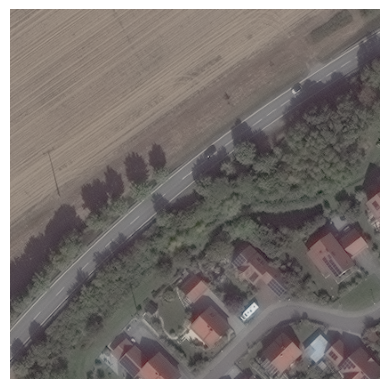

In [ ]:
import cv2
import matplotlib.pyplot as plt

sample_image_path = "/content/drive/MyDrive/image_chips_native/solarpanels_native_1__x0_0_y0_6845_dxdy_416.tif"  # Replace with any actual image path

image = cv2.imread(sample_image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
plt.imshow(image)
plt.axis("off")
plt.show()


In [ ]:
label_path = "/content/drive/MyDrive/labels_hd/solarpanels_hd_1__x0_0_y0_14020_dxdy_832.txt"  # Replace with actual path

with open(label_path, "r") as f:
    content = f.read()  # Read full file as a string
    print("File Content Preview:\n", content[:500])  # Print first 500 characters


File Content Preview:
 0 0.8731971153846154 0.3040865384615385 0.056490384615384616 0.057692307692307696
0 0.6201923076923077 0.28605769230769235 0.04326923076923077 0.040865384615384616
0 0.7235576923076924 0.35697115384615385 0.05288461538461539 0.05288461538461539
0 0.8756009615384616 0.5390625 0.02764423076923077 0.030048076923076924
0 0.9158653846153847 0.5625 0.04326923076923077 0.03365384615384616
0 0.9627403846153847 0.6213942307692308 0.040865384615384616 0.05288461538461539
0 0.9212740384615385 0.77524038461


In [ ]:
# Correct way to read YOLO label file
label_path = "/content/drive/MyDrive/labels_hd/solarpanels_hd_1__x0_0_y0_14020_dxdy_832.txt"

with open(label_path, "r") as f:
    lines = f.readlines()  # Read all lines

# Process each line
annotations = []
for line in lines:
    parts = line.strip().split()  # Split by space
    class_id = int(parts[0])  # Convert class ID to integer
    bbox = list(map(float, parts[1:]))  # Convert coordinates to float
    annotations.append((class_id, bbox))

# Print first 5 labels
print("First 5 annotations:", annotations[:5])


First 5 annotations: [(0, [0.8731971153846154, 0.3040865384615385, 0.056490384615384616, 0.057692307692307696]), (0, [0.6201923076923077, 0.28605769230769235, 0.04326923076923077, 0.040865384615384616]), (0, [0.7235576923076924, 0.35697115384615385, 0.05288461538461539, 0.05288461538461539]), (0, [0.8756009615384616, 0.5390625, 0.02764423076923077, 0.030048076923076924]), (0, [0.9158653846153847, 0.5625, 0.04326923076923077, 0.03365384615384616])]


In [ ]:
import os

# Paths
data_path = "/content/drive/MyDrive/srip_task"  # Change this to your dataset folder
image_path = os.path.join(data_path, "/content/drive/MyDrive/image_chips_native")  # Image folder
label_path = os.path.join(data_path, "/content/drive/MyDrive/extracted_labels/labels/labels_native")  # Label folder

# List all files
image_files = sorted(os.listdir(image_path))
label_files = sorted(os.listdir(label_path))

# Remove file extensions for comparison
image_names = {os.path.splitext(f)[0] for f in image_files}
label_names = {os.path.splitext(f)[0] for f in label_files}

# Find mismatches
missing_labels = image_names - label_names
missing_images = label_names - image_names

print("Total Images:", len(image_names))
print("Total Labels:", len(label_names))
print("Missing Labels for Images:", missing_labels)
print("Missing Images for Labels:", missing_images)


Total Images: 2554
Total Labels: 2542
Missing Labels for Images: {'solarpanels_native_1__x0_7997_y0_10765_dxdy_416(1)', 'solarpanels_native_1__x0_5472_y0_12892_dxdy_416(1)', 'solarpanels_native_1__x0_7934_y0_8347_dxdy_416(1)', 'solarpanels_native_1__x0_7937_y0_11298_dxdy_416(1)', 'srip_task', 'solarpanels_native_1__x0_7999_y0_8765_dxdy_416(1)', 'solarpanels_native_1__x0_7_y0_6959_dxdy_416(1)', 'solarpanels_native_1__x0_7958_y0_8403_dxdy_416(1)', 'solarpanels_native_1__x0_7957_y0_8387_dxdy_416(1)', 'solarpanels_native_1__x0_7962_y0_8558_dxdy_416(1)', 'solarpanels_native_1__x0_7934_y0_8341_dxdy_416(1)', 'solarpanels_native_1__x0_7986_y0_11313_dxdy_416(1)'}
Missing Images for Labels: set()


🖼️ Checking solarpanels_native_1__x0_0_y0_6845_dxdy_416.tif...


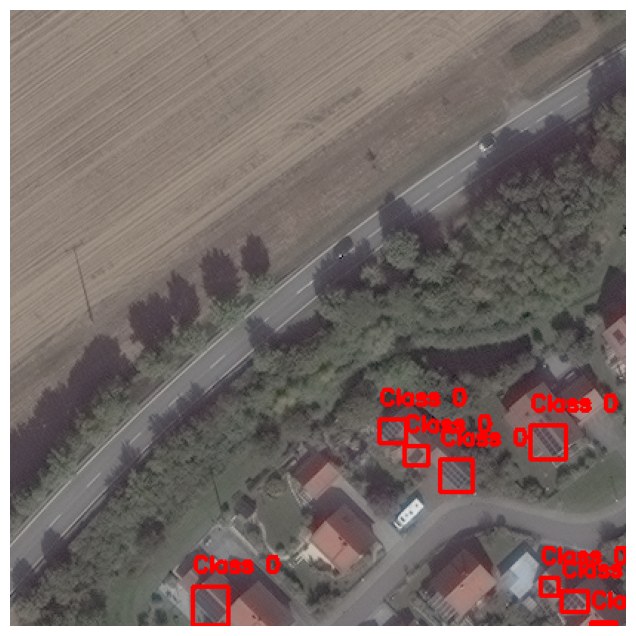

🖼️ Checking solarpanels_native_1__x0_0_y0_6963_dxdy_416.tif...


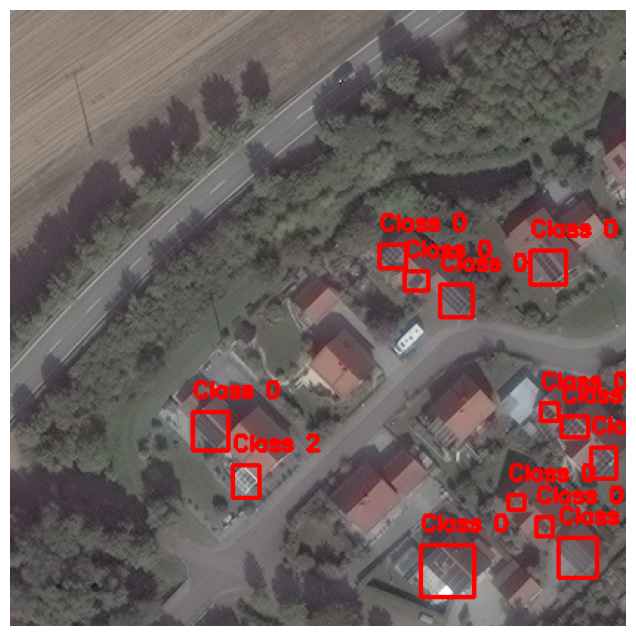

🖼️ Checking solarpanels_native_1__x0_0_y0_7119_dxdy_416.tif...


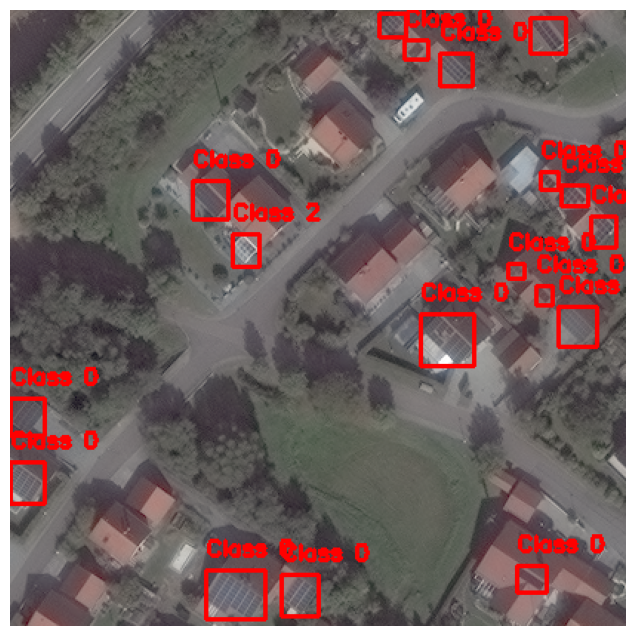

🖼️ Checking solarpanels_native_1__x0_0_y0_7229_dxdy_416.tif...


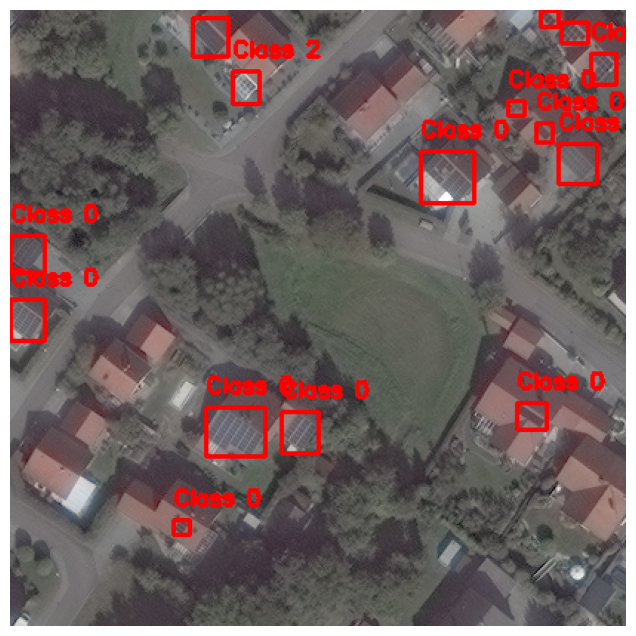

🖼️ Checking solarpanels_native_1__x0_0_y0_7230_dxdy_416.tif...


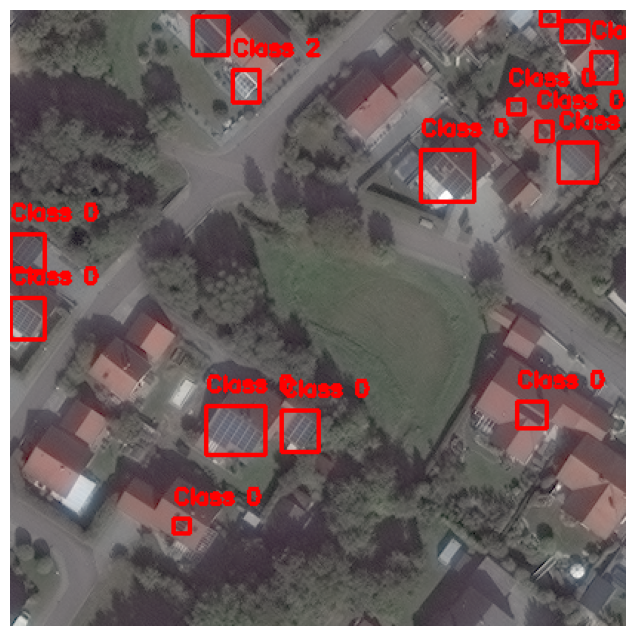

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Paths
image_dir = "/content/drive/MyDrive/image_chips_native"
label_dir = "/content/drive/MyDrive/extracted_labels/labels/labels_native"

# Function to visualize an image with bounding boxes
def visualize_image_with_labels(image_path, label_path):
    # Load image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for correct display

    # Read label file
    with open(label_path, "r") as f:
        labels = f.readlines()

    # Draw bounding boxes
    for label in labels:
        label_data = label.strip().split()
        if len(label_data) != 5:
            print(f"⚠️ Label format error in {label_path}: {label_data}")
            continue  # Skip if incorrect format

        class_id, x_center, y_center, width, height = map(float, label_data)

        # Convert normalized coordinates to pixel values
        img_h, img_w, _ = img.shape
        x_center, y_center, width, height = (
            x_center * img_w,
            y_center * img_h,
            width * img_w,
            height * img_h,
        )

        # Get top-left and bottom-right corners
        x1 = int(x_center - width / 2)
        y1 = int(y_center - height / 2)
        x2 = int(x_center + width / 2)
        y2 = int(y_center + height / 2)

        # Draw rectangle on image
        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Blue box
        cv2.putText(
            img,
            f"Class {int(class_id)}",
            (x1, y1 - 10),
            cv2.FONT_HERSHEY_SIMPLEX,
            0.5,
            (255, 0, 0),
            2,
        )

    # Display image
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.axis("off")
    plt.show()


# Pick a few random images to check
sample_images = sorted(os.listdir(image_dir))[:5]  # Change the number if needed

for img_file in sample_images:
    img_path = os.path.join(image_dir, img_file)
    label_path = os.path.join(label_dir, img_file.replace(".tif", ".txt"))

    if os.path.exists(label_path):
        print(f"🖼️ Checking {img_file}...")
        visualize_image_with_labels(img_path, label_path)
    else:
        print(f"❌ No label found for {img_file}")


In [ ]:
import os
import shutil
import random

# Paths
dataset_dir = "/content/drive/MyDrive/image_chips_native"
label_dir = "/content/drive/MyDrive/extracted_labels/labels/labels_native"

output_dir = "/content/drive/MyDrive/split_dataset"  # Folder to store splits
os.makedirs(output_dir, exist_ok=True)

# Create split folders
for split in ["train", "val", "test"]:
    os.makedirs(os.path.join(output_dir, "images", split), exist_ok=True)
    os.makedirs(os.path.join(output_dir, "labels", split), exist_ok=True)

# Get all image files
image_files = sorted([f for f in os.listdir(dataset_dir) if f.endswith(".tif")])
random.shuffle(image_files)  # Shuffle for randomness

# Split dataset
train_split = int(0.8 * len(image_files))
val_split = int(0.9 * len(image_files))

train_files = image_files[:train_split]
val_files = image_files[train_split:val_split]
test_files = image_files[val_split:]

# Function to move files
def move_files(file_list, split):
    for file_name in file_list:
        # Move image
        src_img = os.path.join(dataset_dir, file_name)
        dest_img = os.path.join(output_dir, "images", split, file_name)
        shutil.copy(src_img, dest_img)

        # Move corresponding label
        label_name = file_name.replace(".tif", ".txt")
        src_label = os.path.join(label_dir, label_name)
        dest_label = os.path.join(output_dir, "labels", split, label_name)

        if os.path.exists(src_label):
            shutil.copy(src_label, dest_label)  # Copy label only if it exists

# Move files to respective folders
move_files(train_files, "train")
move_files(val_files, "val")
move_files(test_files, "test")

print(f"✅ Data split completed!")
print(f"📂 Train: {len(train_files)} images")
print(f"📂 Validation: {len(val_files)} images")
print(f"📂 Test: {len(test_files)} images")


✅ Data split completed!
📂 Train: 2033 images
📂 Validation: 254 images
📂 Test: 255 images


In [ ]:
import os

# Paths
split_path = "/content/drive/MyDrive/split_dataset"
output_path = "/content/drive/MyDrive/split_dataset/yolo_files"
os.makedirs(output_path, exist_ok=True)

# Function to create a .txt file with image paths
def create_split_file(split):
    img_dir = os.path.join(split_path, "images", split)
    txt_path = os.path.join(output_path, f"{split}.txt")

    with open(txt_path, "w") as f:
        for img_name in sorted(os.listdir(img_dir)):
            img_path = os.path.join(img_dir, img_name)
            f.write(img_path + "\n")

    print(f"✅ Created {txt_path}")

# Generate files
for split in ["train", "val", "test"]:
    create_split_file(split)


✅ Created /content/drive/MyDrive/split_dataset/yolo_files/train.txt
✅ Created /content/drive/MyDrive/split_dataset/yolo_files/val.txt
✅ Created /content/drive/MyDrive/split_dataset/yolo_files/test.txt


In [ ]:
yaml_content = f"""train: {output_path}/train.txt
val: {output_path}/val.txt
test: {output_path}/test.txt

nc: 1
names: ["solar_panel"]
"""

yaml_path = os.path.join(output_path, "data.yaml")
with open(yaml_path, "w") as f:
    f.write(yaml_content)

print(f"✅ Created {yaml_path}")


✅ Created /content/drive/MyDrive/split_dataset/yolo_files/data.yaml


In [ ]:
!pip install ultralytics

from ultralytics import YOLO

# Load the YOLOv8 model
model = YOLO("yolov8n.pt")  # 'n' is for nano, you can use yolov8s.pt (small) for better results

# Train the model
results = model.train(
    data="/content/drive/MyDrive/split_dataset/yolo_files/data.yaml",
    epochs=50,
    batch=8,
    imgsz=640,
    device="cuda",
    project="/content/drive/MyDrive/yolo_training",  # Custom directory
    name="solar_panel_detect"  # Subfolder name
)



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.5/921.5 kB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 107.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 839.5 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 58.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninst

100%|██████████| 6.25M/6.25M [00:00<00:00, 211MB/s]


Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/split_dataset/yolo_files/data.yaml, epochs=50, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=/content/drive/MyDrive/yolo_training, name=solar_panel_detect, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, sav

100%|██████████| 755k/755k [00:00<00:00, 43.9MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 175MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/split_dataset/labels/train.cache... 2033 images, 0 backgrounds, 197 corrupt: 100%|██████████| 2033/2033 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/split_dataset/images/train/solarpanels_native_1__x0_0_y0_6963_dxdy_416.tif: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
train: WARNING ⚠️ /content/drive/MyDrive/split_dataset/images/train/solarpanels_native_1__x0_0_y0_7119_dxdy_416.tif: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
train: WARNING ⚠️ /content/drive/MyDrive/split_dataset/images/train/solarpanels_native_1__x0_0_y0_7229_dxdy_416.tif: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
train: WARNING ⚠️ /content/drive/MyDrive/split_dataset/images/train/solarpanels_native_1__x0_0_y0_7230_dxdy_416.tif: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
train: WARNING ⚠️ /content/drive/MyDrive/split_dataset/images/train/solarpanels_native_1__x0_128_y0_7056_dxdy_41

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/split_dataset/labels/val.cache... 254 images, 0 backgrounds, 18 corrupt: 100%|██████████| 254/254 [00:00<?, ?it/s]

val: WARNING ⚠️ /content/drive/MyDrive/split_dataset/images/val/solarpanels_native_1__x0_1398_y0_10006_dxdy_416.tif: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: WARNING ⚠️ /content/drive/MyDrive/split_dataset/images/val/solarpanels_native_1__x0_1853_y0_7572_dxdy_416.tif: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: WARNING ⚠️ /content/drive/MyDrive/split_dataset/images/val/solarpanels_native_1__x0_3017_y0_4656_dxdy_416.tif: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: WARNING ⚠️ /content/drive/MyDrive/split_dataset/images/val/solarpanels_native_1__x0_8350_y0_8860_dxdy_416.tif: ignoring corrupt image/label: Label class 2 exceeds dataset class count 1. Possible class labels are 0-0
val: WARNING ⚠️ /content/drive/MyDrive/split_dataset/images/val/solarpanels_native_1__x0_8385_y0_9752_dxdy_416.tif:

Plotting labels to /content/drive/MyDrive/yolo_training/solar_panel_detect/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/MyDrive/yolo_training/solar_panel_detect
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.54G      1.568      1.744      1.294        118        640: 100%|██████████| 230/230 [08:11<00:00,  2.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:49<00:00,  3.28s/it]

                   all        236       2634      0.738      0.672      0.738       0.47



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.58G      1.389      1.162       1.17         54        640: 100%|██████████| 230/230 [00:47<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.48it/s]

                   all        236       2634      0.749      0.696      0.762      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.55G      1.363      1.047      1.163         36        640: 100%|██████████| 230/230 [00:48<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.00it/s]


                   all        236       2634      0.769      0.761      0.807      0.529

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      1.95G       1.31     0.9396      1.143         25        640: 100%|██████████| 230/230 [00:49<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.28it/s]


                   all        236       2634      0.824      0.798       0.87      0.575

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.96G      1.261     0.8762      1.113         57        640: 100%|██████████| 230/230 [00:47<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.42it/s]


                   all        236       2634      0.829      0.841      0.835      0.548

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50       1.5G      1.246     0.8575      1.104         54        640: 100%|██████████| 230/230 [00:47<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.21it/s]


                   all        236       2634      0.867      0.821      0.883      0.598

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.34G        1.2     0.7977      1.088         30        640: 100%|██████████| 230/230 [00:49<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.35it/s]

                   all        236       2634      0.896      0.846      0.918      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      1.82G      1.206     0.7928      1.092         89        640: 100%|██████████| 230/230 [00:48<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  3.82it/s]

                   all        236       2634      0.905      0.838      0.923      0.611



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       1.6G      1.168     0.7581      1.071         83        640: 100%|██████████| 230/230 [00:47<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.79it/s]

                   all        236       2634      0.878      0.892      0.937      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      1.56G       1.14     0.7326      1.057         61        640: 100%|██████████| 230/230 [00:48<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.06it/s]

                   all        236       2634      0.891      0.862       0.93      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      1.47G      1.138     0.7275      1.058         41        640: 100%|██████████| 230/230 [00:48<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.89it/s]

                   all        236       2634      0.891      0.878      0.927      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      1.64G      1.136     0.7171       1.05         48        640: 100%|██████████| 230/230 [00:47<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.07it/s]

                   all        236       2634      0.884      0.865      0.922       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50       1.6G      1.106      0.691      1.035        120        640: 100%|██████████| 230/230 [00:47<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.32it/s]

                   all        236       2634      0.884      0.872      0.923      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       1.7G      1.094     0.6751      1.037         49        640: 100%|██████████| 230/230 [00:48<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.19it/s]

                   all        236       2634      0.918      0.901      0.954      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      1.48G      1.076     0.6654       1.03         60        640: 100%|██████████| 230/230 [00:47<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.71it/s]

                   all        236       2634      0.892       0.88      0.933      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      1.68G      1.067     0.6656      1.026         35        640: 100%|██████████| 230/230 [00:47<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.68it/s]

                   all        236       2634      0.916      0.879      0.939       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      1.75G      1.042     0.6412      1.013        114        640: 100%|██████████| 230/230 [00:48<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.16it/s]

                   all        236       2634      0.936      0.913       0.96      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      1.65G      1.038     0.6404      1.011         49        640: 100%|██████████| 230/230 [00:47<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.34it/s]

                   all        236       2634      0.932      0.905      0.958      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      1.33G       1.03     0.6296       1.01         61        640: 100%|██████████| 230/230 [00:46<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.08it/s]

                   all        236       2634      0.923      0.894      0.945      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      1.76G      1.011     0.6203     0.9985        231        640: 100%|██████████| 230/230 [00:48<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.76it/s]

                   all        236       2634      0.935      0.907      0.959      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      1.58G       1.01     0.6098     0.9992         30        640: 100%|██████████| 230/230 [00:47<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  3.76it/s]

                   all        236       2634      0.929      0.922       0.96      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      1.68G     0.9836     0.5983      0.989         26        640: 100%|██████████| 230/230 [00:47<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.31it/s]


                   all        236       2634      0.941      0.919      0.966      0.738

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      1.43G     0.9955     0.6003      0.994         61        640: 100%|██████████| 230/230 [00:48<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.50it/s]

                   all        236       2634      0.894      0.917      0.903      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      1.62G     0.9818     0.5937     0.9848         47        640: 100%|██████████| 230/230 [00:46<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  3.84it/s]

                   all        236       2634      0.949      0.927      0.966      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      1.47G     0.9699     0.5867     0.9821         44        640: 100%|██████████| 230/230 [00:47<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.17it/s]

                   all        236       2634      0.937      0.922      0.957      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      1.44G     0.9466     0.5685     0.9743         65        640: 100%|██████████| 230/230 [00:48<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.40it/s]


                   all        236       2634      0.947      0.922      0.971      0.758

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      1.48G     0.9449     0.5669      0.975         28        640: 100%|██████████| 230/230 [00:47<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.73it/s]

                   all        236       2634      0.955      0.927       0.97      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      1.46G     0.9408     0.5746     0.9713         15        640: 100%|██████████| 230/230 [00:47<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.33it/s]

                   all        236       2634      0.949      0.934      0.972      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      1.68G     0.9158     0.5556     0.9685        120        640: 100%|██████████| 230/230 [00:48<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.43it/s]

                   all        236       2634      0.948      0.937      0.971       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      1.62G     0.9108     0.5467     0.9593         40        640: 100%|██████████| 230/230 [00:46<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.58it/s]


                   all        236       2634      0.952      0.933       0.97      0.767

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      1.85G     0.8972     0.5374     0.9531        114        640: 100%|██████████| 230/230 [00:47<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.62it/s]

                   all        236       2634      0.962      0.936      0.976      0.782



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      1.52G     0.8843     0.5321     0.9543         29        640: 100%|██████████| 230/230 [00:48<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.60it/s]


                   all        236       2634       0.96      0.933      0.977      0.789

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      1.39G     0.8885     0.5357     0.9572         36        640: 100%|██████████| 230/230 [00:47<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.64it/s]

                   all        236       2634      0.965      0.932      0.977      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      1.48G     0.8746     0.5267     0.9504         42        640: 100%|██████████| 230/230 [00:47<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.18it/s]

                   all        236       2634      0.958      0.942      0.976      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      1.77G     0.8591     0.5169     0.9466         59        640: 100%|██████████| 230/230 [00:49<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.18it/s]

                   all        236       2634      0.951      0.927      0.975      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      1.48G     0.8549     0.5116     0.9481         39        640: 100%|██████████| 230/230 [00:49<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.33it/s]

                   all        236       2634      0.965      0.943      0.978      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      1.77G     0.8579     0.5149     0.9434         90        640: 100%|██████████| 230/230 [00:47<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.43it/s]

                   all        236       2634       0.97      0.943       0.98      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      1.59G     0.8419     0.5052     0.9358         96        640: 100%|██████████| 230/230 [00:47<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.44it/s]

                   all        236       2634      0.966      0.942      0.979      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      1.59G     0.8276     0.4941     0.9335        102        640: 100%|██████████| 230/230 [00:49<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.85it/s]

                   all        236       2634      0.973      0.945       0.98      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      1.63G     0.8151     0.4905     0.9306         48        640: 100%|██████████| 230/230 [00:48<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.03it/s]

                   all        236       2634      0.971      0.945      0.981      0.816


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      1.39G     0.7828     0.4596     0.9135         90        640: 100%|██████████| 230/230 [00:47<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.78it/s]


                   all        236       2634      0.974      0.945      0.982      0.816

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      1.51G     0.7578     0.4434     0.9058         30        640: 100%|██████████| 230/230 [00:46<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.43it/s]

                   all        236       2634      0.965      0.949      0.982      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      1.48G      0.738     0.4333      0.905         15        640: 100%|██████████| 230/230 [00:46<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:04<00:00,  3.52it/s]

                   all        236       2634      0.978      0.945      0.984      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      1.39G     0.7341     0.4312     0.9026         44        640: 100%|██████████| 230/230 [00:45<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.46it/s]

                   all        236       2634      0.972      0.951      0.984      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      1.47G     0.7274     0.4279      0.898         72        640: 100%|██████████| 230/230 [00:46<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.36it/s]

                   all        236       2634      0.977      0.951      0.984      0.835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      1.36G     0.7124     0.4202     0.8944         20        640: 100%|██████████| 230/230 [00:45<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.21it/s]

                   all        236       2634      0.976      0.952      0.984       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      1.28G     0.7034     0.4142     0.8894         45        640: 100%|██████████| 230/230 [00:47<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.14it/s]

                   all        236       2634      0.977      0.951      0.984      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      1.25G     0.6961     0.4143      0.886         47        640: 100%|██████████| 230/230 [00:45<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.48it/s]

                   all        236       2634      0.976      0.954      0.985      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      1.35G     0.6869     0.4087      0.887         21        640: 100%|██████████| 230/230 [00:46<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:02<00:00,  5.35it/s]

                   all        236       2634      0.975       0.95      0.984      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50       1.3G      0.681     0.4045     0.8823         25        640: 100%|██████████| 230/230 [00:45<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:03<00:00,  4.61it/s]

                   all        236       2634      0.974      0.957      0.984      0.851



50 epochs completed in 0.856 hours.
Optimizer stripped from /content/drive/MyDrive/yolo_training/solar_panel_detect/weights/last.pt, 6.2MB
Optimizer stripped from /content/drive/MyDrive/yolo_training/solar_panel_detect/weights/best.pt, 6.2MB

Validating /content/drive/MyDrive/yolo_training/solar_panel_detect/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 15/15 [00:05<00:00,  2.61it/s]


                   all        236       2634      0.974      0.957      0.984      0.851
Speed: 0.3ms preprocess, 3.9ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to /content/drive/MyDrive/yolo_training/solar_panel_detect


In [ ]:
!pip install ultralytics
from ultralytics import YOLO

# Load the best trained model
model = YOLO(' /content/drive/MyDrive/yolo_training/solar_panel_detect/weights/best.pt')


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.5/921.5 kB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 106.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 96.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstal

In [ ]:
from ultralytics import YOLO

# Load your trained model
model = YOLO("/content/drive/MyDrive/yolo_training/solar_panel_detect/weights/best.pt")

results = model.predict(source="/content/drive/MyDrive/split_dataset/images/test/solarpanels_native_1__x0_0_y0_7249_dxdy_416.tif", save=True, conf=0.5)




image 1/1 /content/drive/MyDrive/split_dataset/images/test/solarpanels_native_1__x0_0_y0_7249_dxdy_416.tif: 640x640 11 solar_panels, 435.7ms
Speed: 24.8ms preprocess, 435.7ms inference, 39.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict



image 1/1 /content/drive/MyDrive/split_dataset/images/test/solarpanels_native_1__x0_0_y0_7249_dxdy_416.tif: 640x640 14 solar_panels, 450.8ms
Speed: 21.6ms preprocess, 450.8ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


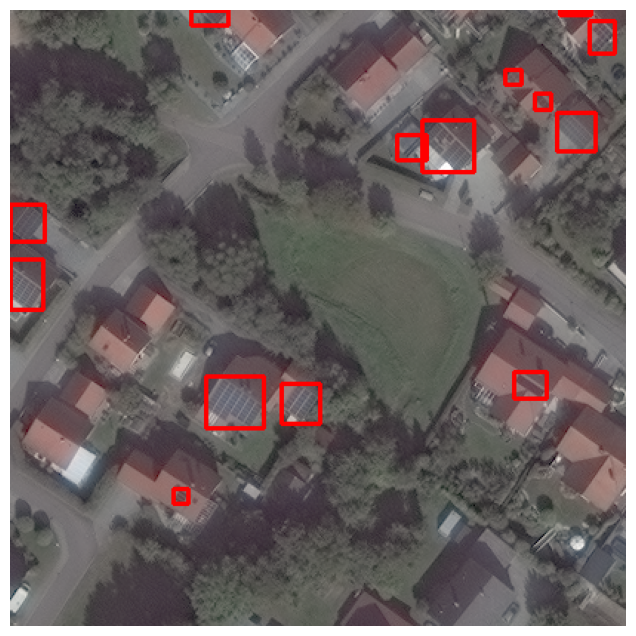

In [ ]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load your trained YOLO model
model_path = "/content/drive/MyDrive/yolo_training/solar_panel_detect/weights/best.pt"
model = YOLO(model_path)

# Path to the test image
image_path = "/content/drive/MyDrive/split_dataset/images/test/solarpanels_native_1__x0_0_y0_7249_dxdy_416.tif"

# Run inference
results = model(image_path)

# Get original image
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct visualization

# Draw only bounding boxes (without labels)
for box in results[0].boxes.xyxy:
    x1, y1, x2, y2 = map(int, box)  # Convert to integer coordinates
    cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Blue box with thickness 2

# Display the image
plt.figure(figsize=(8, 8))
plt.imshow(img)
plt.axis("off")
plt.show()


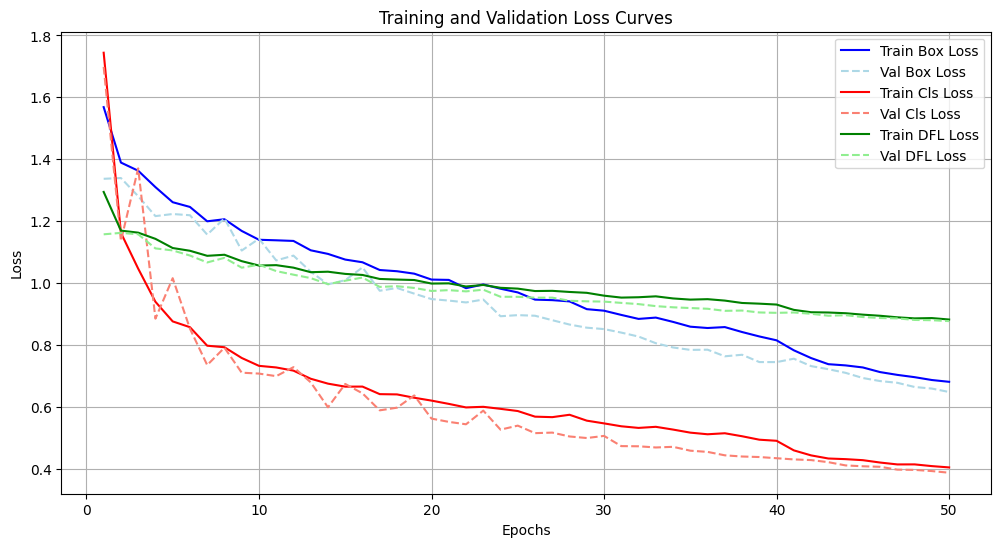

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to the results.csv file generated by YOLO
csv_path = "/content/drive/MyDrive/yolo_training/solar_panel_detect/results.csv"  # Update if needed

# Load the CSV file
df = pd.read_csv(csv_path)

# Plot loss curves
plt.figure(figsize=(12, 6))

# Plot box loss
plt.plot(df['epoch'], df['train/box_loss'], label='Train Box Loss', color='blue')
plt.plot(df['epoch'], df['val/box_loss'], label='Val Box Loss', color='lightblue', linestyle='dashed')

# Plot classification loss
plt.plot(df['epoch'], df['train/cls_loss'], label='Train Cls Loss', color='red')
plt.plot(df['epoch'], df['val/cls_loss'], label='Val Cls Loss', color='salmon', linestyle='dashed')

# Plot DFL loss
plt.plot(df['epoch'], df['train/dfl_loss'], label='Train DFL Loss', color='green')
plt.plot(df['epoch'], df['val/dfl_loss'], label='Val DFL Loss', color='lightgreen', linestyle='dashed')

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Curves")
plt.legend()
plt.grid()
plt.show()



image 1/1 /content/drive/MyDrive/split_dataset/images/test/solarpanels_native_1__x0_1039_y0_7477_dxdy_416.tif: 640x640 15 solar_panels, 176.5ms
Speed: 5.8ms preprocess, 176.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


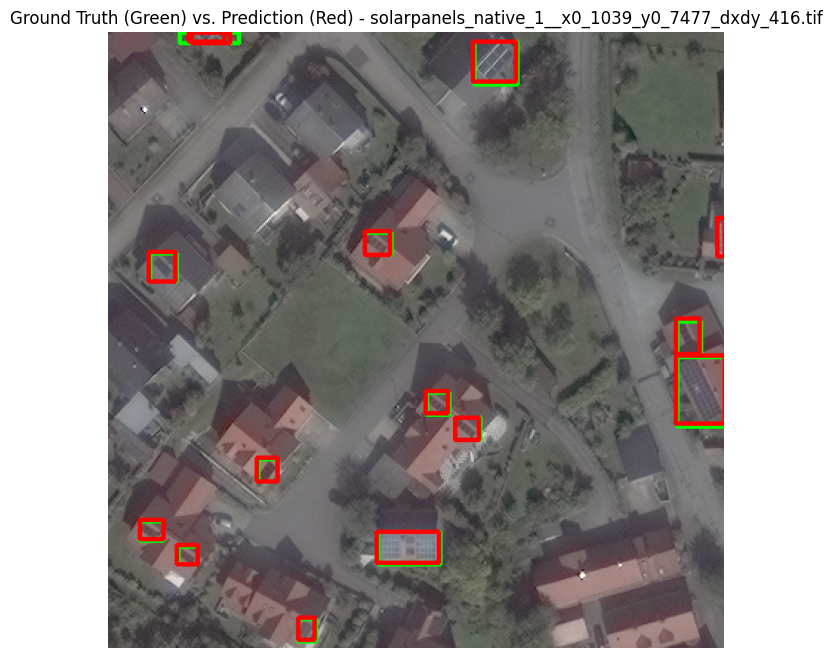


image 1/1 /content/drive/MyDrive/split_dataset/images/test/solarpanels_native_1__x0_1229_y0_3745_dxdy_416.tif: 640x640 5 solar_panels, 226.5ms
Speed: 5.6ms preprocess, 226.5ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


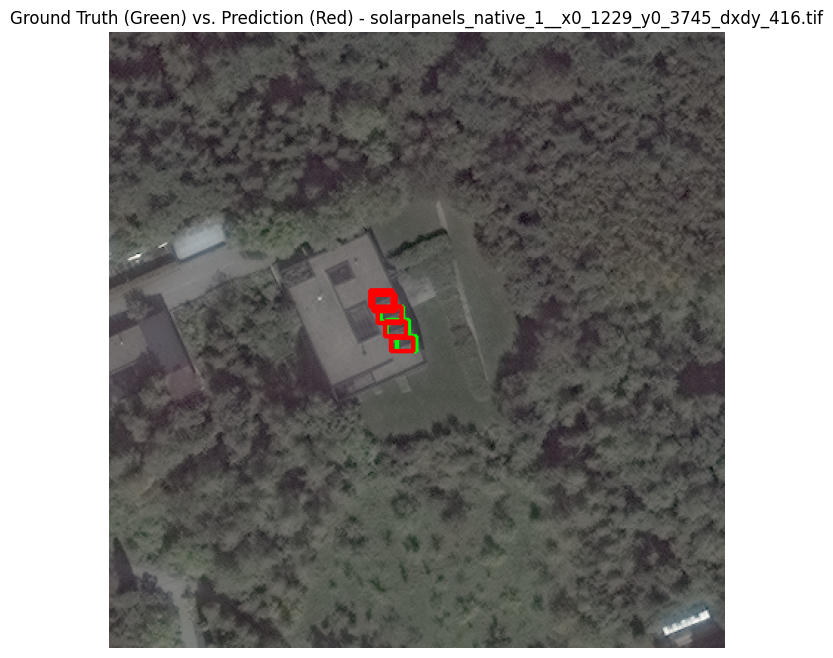


image 1/1 /content/drive/MyDrive/split_dataset/images/test/solarpanels_native_1__x0_1981_y0_9632_dxdy_416.tif: 640x640 5 solar_panels, 168.2ms
Speed: 6.3ms preprocess, 168.2ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


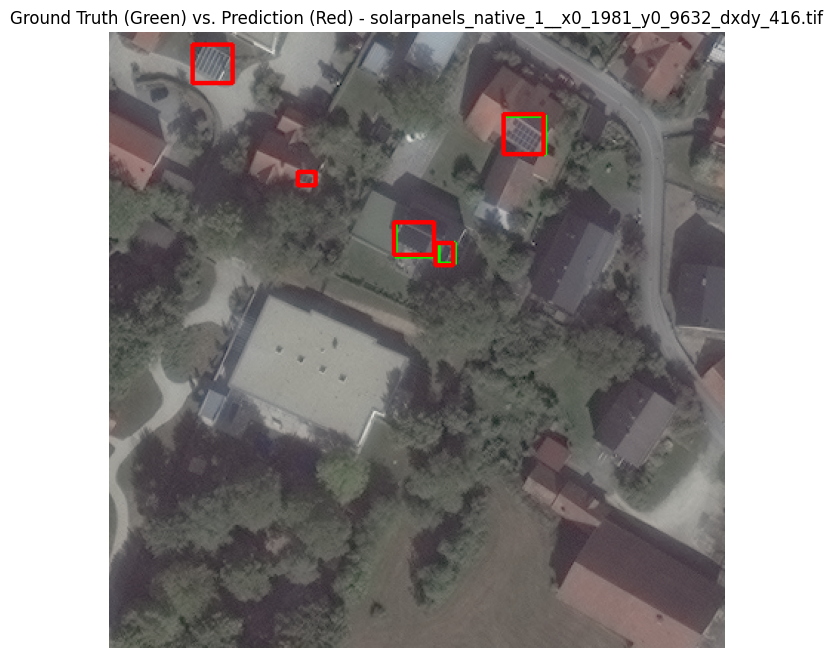


image 1/1 /content/drive/MyDrive/split_dataset/images/test/solarpanels_native_1__x0_2164_y0_8552_dxdy_416.tif: 640x640 2 solar_panels, 174.4ms
Speed: 5.6ms preprocess, 174.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


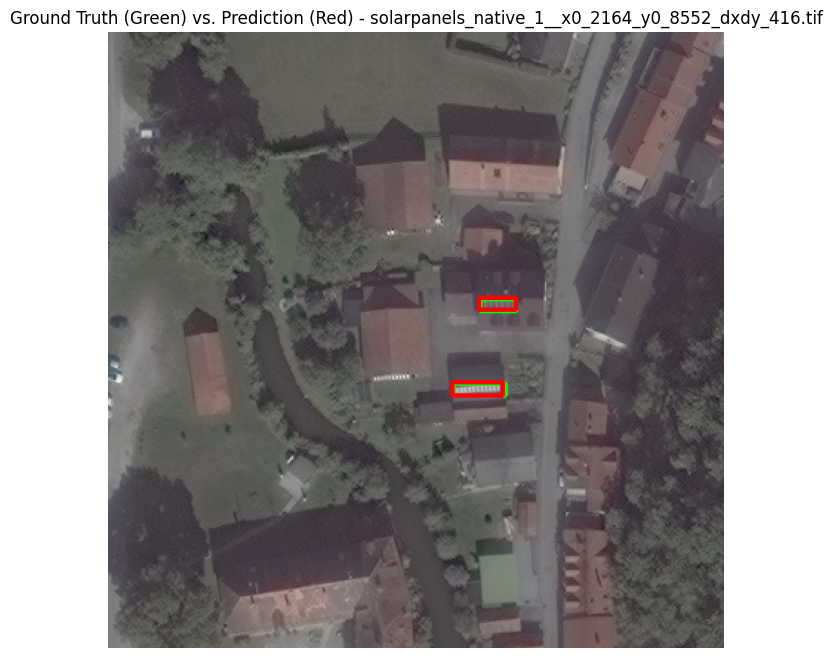


image 1/1 /content/drive/MyDrive/split_dataset/images/test/solarpanels_native_3__x0_9972_y0_12567_dxdy_416.tif: 640x640 2 solar_panels, 452.4ms
Speed: 5.2ms preprocess, 452.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)


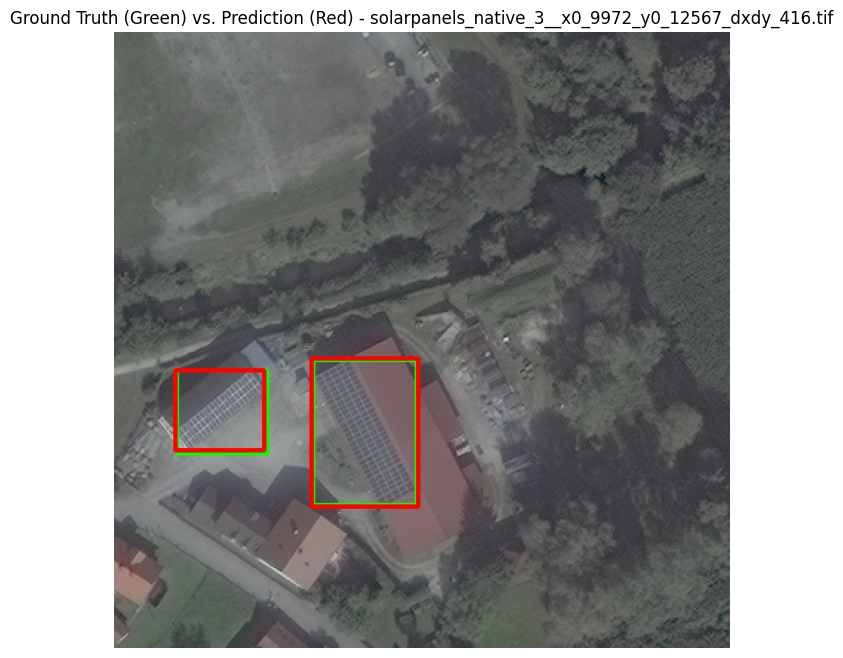

In [ ]:
import cv2
import torch
import numpy as np
import matplotlib.pyplot as plt

from ultralytics import YOLO

# Load the trained YOLO model
model = YOLO("/content/drive/MyDrive/yolo_training/solar_panel_detect/weights/best.pt")

# List of five test image paths
test_images = [
    "/content/drive/MyDrive/split_dataset/images/test/solarpanels_native_1__x0_1039_y0_7477_dxdy_416.tif",
    "/content/drive/MyDrive/split_dataset/images/test/solarpanels_native_1__x0_1229_y0_3745_dxdy_416.tif",
    "/content/drive/MyDrive/split_dataset/images/test/solarpanels_native_1__x0_1981_y0_9632_dxdy_416.tif",
    "/content/drive/MyDrive/split_dataset/images/test/solarpanels_native_1__x0_2164_y0_8552_dxdy_416.tif",
    "/content/drive/MyDrive/split_dataset/images/test/solarpanels_native_3__x0_9972_y0_12567_dxdy_416.tif"  # Change as per availability
]

# Process each image
for image_path in test_images:
    # Load image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Get image dimensions
    h, w, _ = image.shape

    # Load ground truth labels (assuming .txt file with same name as image)
    label_path = image_path.replace("images/test", "labels/test").replace(".tif", ".txt")

    # Read ground truth bounding boxes
    gt_boxes = []
    with open(label_path, "r") as f:
        for line in f.readlines():
            class_id, x_center, y_center, width, height = map(float, line.strip().split())
            x1, y1 = int((x_center - width / 2) * w), int((y_center - height / 2) * h)
            x2, y2 = int((x_center + width / 2) * w), int((y_center + height / 2) * h)
            gt_boxes.append((x1, y1, x2, y2))

    # Run model inference
    results = model(image_path)

    # Extract predicted bounding boxes
    pred_boxes = results[0].boxes.xyxy.cpu().numpy()  # Convert to NumPy array

    # Draw ground truth boxes in Green
    for (x1, y1, x2, y2) in gt_boxes:
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Draw predicted boxes in Red
    for (x1, y1, x2, y2) in pred_boxes:
        cv2.rectangle(image, (int(x1), int(y1)), (int(x2), int(y2)), (255, 0, 0), 2)

    # Show Image with Bounding Boxes
    plt.figure(figsize=(8, 8))
    plt.imshow(image)
    plt.title(f"Ground Truth (Green) vs. Prediction (Red) - {image_path.split('/')[-1]}")
    plt.axis("off")
    plt.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.5/921.5 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 40.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

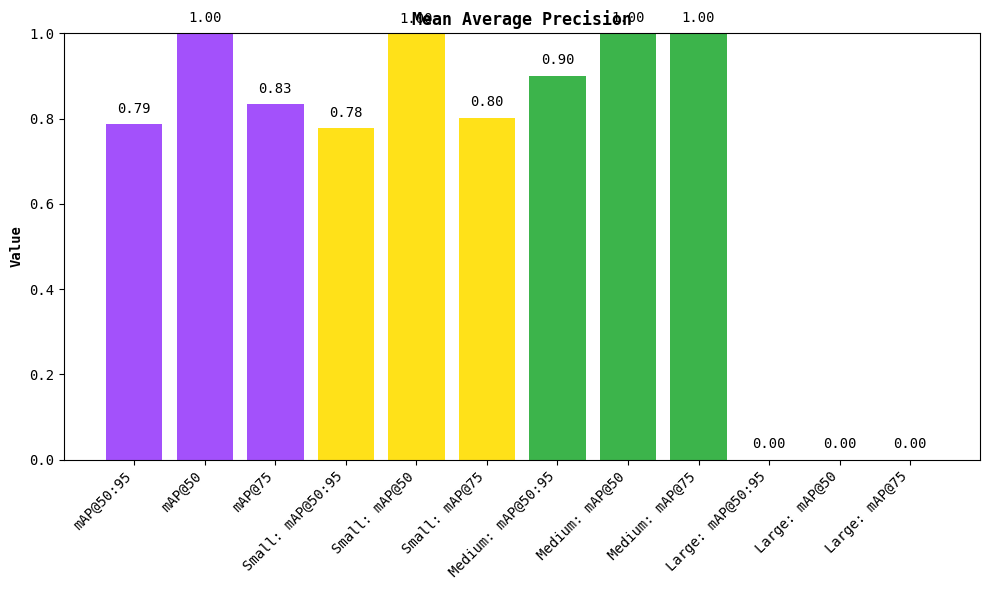

In [ ]:
!pip install supervision ultralytics

import supervision as sv
import cv2
import numpy as np
import torch
from ultralytics import YOLO
from supervision.metrics import MeanAveragePrecision

# Load the trained YOLO model
model = YOLO("/content/drive/MyDrive/yolo_training/solar_panel_detect/weights/best.pt")

# Test images directory
test_images = [
    "/content/drive/MyDrive/split_dataset/images/test/solarpanels_native_1__x0_1039_y0_7477_dxdy_416.tif",
    "/content/drive/MyDrive/split_dataset/images/test/solarpanels_native_1__x0_1229_y0_3745_dxdy_416.tif",
    "/content/drive/MyDrive/split_dataset/images/test/solarpanels_native_1__x0_1981_y0_9632_dxdy_416.tif",
    "/content/drive/MyDrive/split_dataset/images/test/solarpanels_native_1__x0_2164_y0_8552_dxdy_416.tif",
    "/content/drive/MyDrive/split_dataset/images/test/solarpanels_native_3__x0_9972_y0_12567_dxdy_416.tif"
]

# Store GT and predicted boxes
ground_truth_detections = []
predicted_detections = []

for image_path in test_images:
    image = cv2.imread(image_path)
    h, w, _ = image.shape

    # Load ground truth labels
    label_path = image_path.replace("images/test", "labels/test").replace(".tif", ".txt")
    gt_boxes = []
    gt_labels = []

    with open(label_path, "r") as f:
        for line in f.readlines():
            class_id, x_center, y_center, width, height = map(float, line.strip().split())
            x1, y1 = int((x_center - width / 2) * w), int((y_center - height / 2) * h)
            x2, y2 = int((x_center + width / 2) * w), int((y_center + height / 2) * h)
            gt_boxes.append([x1, y1, x2, y2])
            gt_labels.append(int(class_id))

    # Run model inference
    results = model(image_path)
    pred_boxes = results[0].boxes.xyxy.cpu().numpy()  # Predicted bounding boxes
    pred_confidences = results[0].boxes.conf.cpu().numpy()  # Confidence scores
    pred_labels = results[0].boxes.cls.cpu().numpy().astype(int)  # Predicted class labels

    # Convert to supervision.Detections format
    ground_truth_detections.append(sv.Detections(xyxy=np.array(gt_boxes), class_id=np.array(gt_labels)))
    predicted_detections.append(
        sv.Detections(xyxy=pred_boxes, confidence=pred_confidences, class_id=pred_labels)
    )

# **Compute mAP@50 using MeanAveragePrecision**
map_metric = MeanAveragePrecision()

# Update metric for each image's detections
for gt, pred in zip(ground_truth_detections, predicted_detections):
    map_metric.update(predictions=pred, targets=gt)

# Compute the final mAP values
map_result = map_metric.compute()

# Print mAP@50
print(f"mAP@50: {map_result.map50:.4f}")

# Optional: Print detailed results
print(map_result)

# Plot the mAP@50 graph
map_result.plot()


In [ ]:
import os
import numpy as np
import cv2
import supervision as sv
from supervision.metrics import Precision, Recall

# 🔹 UPDATE THESE PATHS
labels_dir = "/content/drive/MyDrive/split_dataset/labels/test"  # Folder containing YOLO TXT files
images_dir = "/content/drive/MyDrive/split_dataset/images/test"  # Folder containing .tif images

# 🔹 YOLO Label Format: class_id x_center y_center width height (normalized)

def load_yolo_labels(label_path, img_w, img_h):
    """Loads YOLO labels and converts them to (x1, y1, x2, y2, class_id)."""
    boxes = []
    with open(label_path, "r") as f:
        for line in f.readlines():
            parts = line.strip().split()
            class_id = int(parts[0])
            x_center, y_center, width, height = map(float, parts[1:])

            # Convert YOLO format to absolute xyxy format
            x1 = (x_center - width / 2) * img_w
            y1 = (y_center - height / 2) * img_h
            x2 = (x_center + width / 2) * img_w
            y2 = (y_center + height / 2) * img_h

            boxes.append([x1, y1, x2, y2, class_id])

    return np.array(boxes, dtype=np.float32) if boxes else np.empty((0, 5), dtype=np.float32)

# 🔹 Load images and labels
gt_boxes_list = []
pred_boxes_list = []
pred_confidences = []  # Store confidence scores for predictions

for filename in os.listdir(labels_dir):
    if filename.endswith(".txt"):
        label_path = os.path.join(labels_dir, filename)
        image_path = os.path.join(images_dir, filename.replace(".txt", ".tif"))

        # Load image to get dimensions
        img = cv2.imread(image_path)
        if img is None:
            print(f"🚨 Warning: Could not load image {image_path}, skipping.")
            continue
        img_h, img_w = img.shape[:2]

        # Get ground truth boxes
        gt_boxes = load_yolo_labels(label_path, img_w, img_h)
        if gt_boxes.size == 0:
            print(f"🚨 Warning: No GT boxes found in {label_path}, skipping.")
            continue

        # Simulate Predicted Boxes (Replace this with your model's output)
        pred_boxes = gt_boxes + np.random.randint(-10, 10, size=gt_boxes.shape)  # Small offset for simulation
        pred_boxes[:, :4] = np.clip(pred_boxes[:, :4], 0, [img_w, img_h, img_w, img_h])  # Keep boxes in bounds
        pred_conf = np.random.uniform(0.6, 1.0, size=(pred_boxes.shape[0],))  # Simulated confidence

        gt_boxes_list.append(gt_boxes)
        pred_boxes_list.append(pred_boxes)
        pred_confidences.append(pred_conf)

# 🔹 Convert to numpy arrays
if not gt_boxes_list or not pred_boxes_list:
    raise ValueError("🚨 Error: No valid ground truth or predicted boxes found!")

gt_boxes = np.vstack(gt_boxes_list)
pred_boxes = np.vstack(pred_boxes_list)
pred_confidences = np.concatenate(pred_confidences)

# 🔹 Convert to supervision.Detections format
gt_detections = sv.Detections(xyxy=gt_boxes[:, :4], class_id=gt_boxes[:, 4].astype(int))
pred_detections = sv.Detections(xyxy=pred_boxes[:, :4], class_id=pred_boxes[:, 4].astype(int), confidence=pred_confidences)

# 🔹 Compute Metrics
precision_metric = Precision()
precision_result = precision_metric.update(pred_detections, gt_detections).compute()

recall_metric = Recall()
recall_result = recall_metric.update(pred_detections, gt_detections).compute()

# 🔹 Compute F1 Score
precision = precision_result.precision_at_50
recall = recall_result.recall_at_50
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

# 🔹 Print Results
print(f"✅ Precision at IoU=0.5: {precision:.4f}")
print(f"✅ Recall at IoU=0.5: {recall:.4f}")
print(f"✅ F1 Score at IoU=0.5: {f1_score:.4f}")


✅ Precision at IoU=0.5: 0.6059
✅ Recall at IoU=0.5: 0.0294
✅ F1 Score at IoU=0.5: 0.0561


In [ ]:
import os
import cv2
import numpy as np
import supervision as sv
from ultralytics import YOLO
from supervision.metrics import Precision

# 🟢 Load the trained YOLOv8 model
MODEL_PATH = "/content/drive/MyDrive/yolo_training/solar_panel_detect/weights/best.pt"
model = YOLO(MODEL_PATH)

# 🟢 Paths (Update these)
IMAGES_DIR = "/content/drive/MyDrive/split_dataset/images/test/"   # Image folder
LABELS_DIR = "/content/drive/MyDrive/split_dataset/labels/test/"   # Label folder

# 🔹 Convert YOLO format (x_center, y_center, width, height) → (x_min, y_min, x_max, y_max)
def yolo_to_xyxy(yolo_box, img_w, img_h):
    x_center, y_center, width, height = yolo_box
    x_min = int((x_center - width / 2) * img_w)
    y_min = int((y_center - height / 2) * img_h)
    x_max = int((x_center + width / 2) * img_w)
    y_max = int((y_center + height / 2) * img_h)
    return [x_min, y_min, x_max, y_max]

# 🔹 Load Ground Truth (GT) Boxes from YOLO labels
def get_ground_truth_boxes(label_path, img_w, img_h):
    gt_boxes = []
    with open(label_path, "r") as f:
        lines = f.readlines()
        for line in lines:
            values = list(map(float, line.strip().split()))
            class_id = int(values[0])
            box = yolo_to_xyxy(values[1:], img_w, img_h)
            gt_boxes.append(box + [class_id])  # [x_min, y_min, x_max, y_max, class_id]
    return np.array(gt_boxes, dtype=np.float32) if gt_boxes else np.empty((0, 5))

# 🔹 Run YOLO model on an image to get predictions
def get_predicted_boxes(image_path):
    results = model(image_path)  # Run YOLO model
    pred_boxes = []

    for r in results:
        if r.boxes is not None and r.boxes.xyxy.numel() > 0:  # Check if boxes exist
            boxes = r.boxes.xyxy.cpu().numpy()  # [x_min, y_min, x_max, y_max]
            class_ids = r.boxes.cls.cpu().numpy().astype(int)  # Class IDs
            confs = r.boxes.conf.cpu().numpy()  # Confidence scores
            pred_boxes = np.column_stack((boxes, class_ids, confs))  # [x_min, y_min, x_max, y_max, class_id, conf]

    # 🔹 Fix applied: Instead of `if pred_boxes`, use `.size`
    return np.array(pred_boxes, dtype=np.float32) if len(pred_boxes) > 0 else np.empty((0, 6), dtype=np.float32)


# 🟢 Run on all images in dataset
gt_boxes_list = []
pred_boxes_list = []
pred_confidences = []

for img_file in os.listdir(IMAGES_DIR):
    if img_file.endswith(".tif"):  # Process only .tif images
        img_path = os.path.join(IMAGES_DIR, img_file)
        label_path = os.path.join(LABELS_DIR, img_file.replace(".tif", ".txt"))

        # Load image to get dimensions
        img = cv2.imread(img_path)
        if img is None:
            print(f"⚠️ Warning: Could not read image {img_path}")
            continue
        img_h, img_w = img.shape[:2]

        # Load ground truth labels
        gt_boxes = get_ground_truth_boxes(label_path, img_w, img_h) if os.path.exists(label_path) else np.empty((0, 5))
        pred_boxes = get_predicted_boxes(img_path)

        # Store results
        gt_boxes_list.append(gt_boxes)
        pred_boxes_list.append(pred_boxes[:, :5])  # Ignore confidence for precision calculation
        pred_confidences.append(pred_boxes[:, 5])  # Store confidence separately

# 🟢 Convert to supervision.Detections format
if gt_boxes_list and pred_boxes_list:
    gt_detections = sv.Detections(
        xyxy=np.vstack(gt_boxes_list)[:, :4],  # [x_min, y_min, x_max, y_max]
        class_id=np.vstack(gt_boxes_list)[:, 4].astype(int)
    )
    pred_detections = sv.Detections(
        xyxy=np.vstack(pred_boxes_list)[:, :4],  # [x_min, y_min, x_max, y_max]
        class_id=np.vstack(pred_boxes_list)[:, 4].astype(int),
        confidence=np.hstack(pred_confidences)  # Confidence scores
    )

    # Compute Precision
    precision_metric = Precision()
    precision_result = precision_metric.update(pred_detections, gt_detections).compute()

    # Print results
    print(f"\n✅ Precision at IoU=0.5: {precision_result.precision_at_50:.4f}")
    print(f"✅ Full Precision Result:\n{precision_result}")
else:
    print("❌ No valid GT or Pred boxes found.")



image 1/1 /content/drive/MyDrive/split_dataset/images/test/solarpanels_native_2__x0_149_y0_14210_dxdy_416.tif: 640x640 6 solar_panels, 183.7ms
Speed: 4.3ms preprocess, 183.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/split_dataset/images/test/solarpanels_native_1__x0_4618_y0_13190_dxdy_416.tif: 640x640 4 solar_panels, 185.5ms
Speed: 3.7ms preprocess, 185.5ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/split_dataset/images/test/solarpanels_native_3__x0_9236_y0_12775_dxdy_416.tif: 640x640 3 solar_panels, 192.2ms
Speed: 4.3ms preprocess, 192.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyDrive/split_dataset/images/test/solarpanels_native_3__x0_13336_y0_4676_dxdy_416.tif: 640x640 5 solar_panels, 177.7ms
Speed: 3.7ms preprocess, 177.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/drive/MyD


✅ Precision at IoU=0.5: 0.9176
✅ Full Precision Result:
PrecisionResult:
Metric target:    MetricTarget.BOXES
Averaging method: AveragingMethod.WEIGHTED
P @ 50:     0.9176
P @ 75:     0.8788
P @ thresh: [    0.91757     0.91724     0.91426     0.90863     0.90101     0.87882     0.84604     0.76293     0.61094      0.2957]
IoU thresh: [        0.5        0.55         0.6        0.65         0.7        0.75         0.8        0.85         0.9        0.95]
Precision per class:
  0: [    0.92428     0.92395     0.92095     0.91528     0.90761     0.88526     0.85223     0.76851     0.61541     0.29787]
  1: [          0           0           0           0           0           0           0           0           0           0]
  2: [          0           0           0           0           0           0           0           0           0           0]

Small objects:
  PrecisionResult:
  Metric target:    MetricTarget.BOXES
  Averaging method: AveragingMethod.WEIGHTED
  P @ 50:     0.865

In [ ]:
import os
import numpy as np
import pandas as pd

# 🔹 Paths (Change these to your actual paths)
LABELS_DIR = "/content/drive/MyDrive/split_dataset/labels/val/"  # Folder containing YOLO label files
IMAGES_DIR = "/content/drive/MyDrive/split_dataset/images/val/"  # Folder containing images

# 🔹 Initialize counters
total_solar_panel_instances = 0
label_counts = {}  # Dictionary to store counts of labels per image

# 🔹 Loop through images
for img_file in os.listdir(IMAGES_DIR):
    if img_file.endswith(".tif"):  # Only process TIFF images
        label_file = os.path.join(LABELS_DIR, img_file.replace(".tif", ".txt"))  # Get corresponding label file

        if os.path.exists(label_file):
            with open(label_file, "r") as f:
                lines = f.readlines()
                num_labels = len(lines)  # Count number of bounding boxes (instances)
                total_solar_panel_instances += num_labels  # Add to total count

                # Count images based on number of labels
                label_counts[num_labels] = label_counts.get(num_labels, 0) + 1
        else:
            # If label file does not exist, count as 0 labels
            label_counts[0] = label_counts.get(0, 0) + 1

# 🔹 Convert label counts to a Pandas DataFrame
df_label_counts = pd.DataFrame.from_dict(label_counts, orient="index", columns=["Number of Images"])
df_label_counts.index.name = "Number of Labels"

# 🔹 Save to CSV
df_label_counts.to_csv("/content/drive/MyDrive/label_statistics.csv")

# 🔹 Print statistics
print(f"\n✅ Total Solar Panel Instances in Dataset: {total_solar_panel_instances}\n")
print("🔹 Images with X Labels:")
print(df_label_counts)



✅ Total Solar Panel Instances in Dataset: 2773

🔹 Images with X Labels:
                  Number of Images
Number of Labels                  
2                               23
7                               18
6                               23
13                              12
74                               1
12                               7
5                               20
31                               1
1                               11
8                               12
39                               1
10                              11
16                               4
4                               20
14                               9
3                               18
9                               15
19                               4
11                              12
20                               2
17                               3
30                               3
42                               1
37                               3
38               